In [118]:
import numpy as np
import plotly.graph_objects as go
import numpy as np
import random
from typing import List
from scipy.spatial import KDTree

In [119]:



some_range = list(range(0, 10))
some_choice_index = random.choice(list(range(len(some_range))))
del some_range[some_choice_index]
some_range


[0, 1, 2, 3, 4, 5, 7, 8, 9]

In [131]:
def get_box_min_max(box_range: List[int]):
    index_range = list(range(len(box_range)))
    min_index = random.choice(index_range)
    del index_range[min_index]
    max_index = random.choice(index_range)
    
    return box_range[min_index], box_range[max_index]


def generate_box():
    box_range = list(range(0, 10))
    
    x_min, x_max = get_box_min_max(box_range)
    y_min, y_max = get_box_min_max(box_range)
    z_min, z_max = get_box_min_max(box_range)
    
    return np.array([
        [x_min, x_min, x_max, x_max, x_min, x_min, x_max, x_max,],
        [y_min, y_max, y_max, y_min, y_min, y_max, y_max, y_min,],
        [z_min, z_min, z_min, z_min, z_max, z_max, z_max, z_max,]
    ])

greek_symbols = ["alpha", "beta", "gamma", "delta", "epsilon", "zeta"]

# boxes = [generate_box() for _ in range(5)]
# boxes

boxes = {greek_symbols[i]: generate_box() for i in range(5)}
boxes


{'alpha': array([[6, 6, 0, 0, 6, 6, 0, 0],
        [2, 7, 7, 2, 2, 7, 7, 2],
        [8, 8, 8, 8, 1, 1, 1, 1]]),
 'beta': array([[4, 4, 7, 7, 4, 4, 7, 7],
        [2, 6, 6, 2, 2, 6, 6, 2],
        [6, 6, 6, 6, 3, 3, 3, 3]]),
 'gamma': array([[2, 2, 9, 9, 2, 2, 9, 9],
        [4, 6, 6, 4, 4, 6, 6, 4],
        [6, 6, 6, 6, 1, 1, 1, 1]]),
 'delta': array([[1, 1, 5, 5, 1, 1, 5, 5],
        [0, 4, 4, 0, 0, 4, 4, 0],
        [8, 8, 8, 8, 6, 6, 6, 6]]),
 'epsilon': array([[3, 3, 2, 2, 3, 3, 2, 2],
        [7, 5, 5, 7, 7, 5, 5, 7],
        [9, 9, 9, 9, 4, 4, 4, 4]])}

In [121]:
some_array = np.array([
    [0, 1, 3,],
    [4, 5, 6,]
])

kdtree = KDTree(some_array)

kdtree.data

array([[0., 1., 3.],
       [4., 5., 6.]])

In [122]:
kdtree.leafsize

10

In [123]:
# Query kdtree based on r (radius) around a point (x)
matching_point_indices = kdtree.query_ball_point(x=[0, 0 , 0], r=4)

In [124]:
for point_index in matching_point_indices:
    print(kdtree.data[point_index])

[0. 1. 3.]


In [127]:
tree_alpha = KDTree(np.transpose(boxes["alpha"]))
tree_alpha.data

array([[5., 3., 2.],
       [5., 7., 2.],
       [8., 7., 2.],
       [8., 3., 2.],
       [5., 3., 7.],
       [5., 7., 7.],
       [8., 7., 7.],
       [8., 3., 7.]])

In [128]:
list(range(0, 10))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [135]:
# TODO: next step here is to push ALL datapoints into the kdtree but use a map to their indices
# i.e. 
# example = {
#     0: "beta",
#     ...
#     7: "beta",
#     8: "gamma",
#     ...
#     15: "gamma",
#     ...
# }
# Then we can query the original shape/box by its point indices
box_names = ["beta", "gamma", "delta", "epsilon"]  # TODO: Is there a better way to directly tie the box_name to the given array?
transposed_points = np.transpose(boxes[box_names[0]])
for box_name in box_names[1:]:
    transposed_points = np.append(transposed_points, np.transpose(boxes[box_name]), axis=0)

tree_beta = KDTree(transposed_points)
tree_beta.data

# TODO: Continue translating data to use new 'boxes' dictionary

array([[4., 2., 6.],
       [4., 6., 6.],
       [7., 6., 6.],
       [7., 2., 6.],
       [4., 2., 3.],
       [4., 6., 3.],
       [7., 6., 3.],
       [7., 2., 3.],
       [2., 4., 6.],
       [2., 6., 6.],
       [9., 6., 6.],
       [9., 4., 6.],
       [2., 4., 1.],
       [2., 6., 1.],
       [9., 6., 1.],
       [9., 4., 1.],
       [1., 0., 8.],
       [1., 4., 8.],
       [5., 4., 8.],
       [5., 0., 8.],
       [1., 0., 6.],
       [1., 4., 6.],
       [5., 4., 6.],
       [5., 0., 6.],
       [3., 7., 9.],
       [3., 5., 9.],
       [2., 5., 9.],
       [2., 7., 9.],
       [3., 7., 4.],
       [3., 5., 4.],
       [2., 5., 4.],
       [2., 7., 4.]])

In [138]:
import sys

box_map = {}
i = 0

for box_name in box_names:
    for j in range(0 + i, 8 + i):
        box_map[j] = box_name
    i += 8

sys.getsizeof(box_map)

1176

In [139]:
box_map[11]

'gamma'

In [140]:
list_of_indices = tree_alpha.query_ball_tree(other=tree_beta, r=3)
list_of_indices

[[4, 7],
 [5, 6, 28],
 [6, 14],
 [7, 15],
 [0, 3, 18, 22],
 [1, 2, 24],
 [2, 10],
 [3, 11]]

In [142]:
box_matches = []
for indices in list_of_indices:
    for i in indices:
        if box_map[i] not in box_matches:
            box_matches.append(box_map[i])
box_matches

['beta', 'epsilon', 'gamma', 'delta']

In [143]:
box = box_map[0]
box

'beta'

In [144]:
# for each element in `tree_alpha`, `list_of_indices[i]` is a list of indices of neighbors in `tree_beta.data`
# This loop prints all points in alpha that are near beta
transformed_points = []
for i, indices in enumerate(list_of_indices):
    for j in indices:
        print(f"ALPHA POINT: {tree_alpha.data[i]} -> BETA POINT: {tree_beta.data[j]}")
        point = np.array([
            tree_alpha.data[i],
            tree_beta.data[j]
        ])
        transformed_points.append(np.transpose(point))

# TODO: Need shapes with two points each only to create lines in 3d
"""
i.e.
  a  b
[ 
 [4, 4],  # x
 [4, 2],  # y
 [1, 2]   # z
]
"""

ALPHA POINT: [5. 3. 2.] -> BETA POINT: [4. 2. 3.]
ALPHA POINT: [5. 3. 2.] -> BETA POINT: [7. 2. 3.]
ALPHA POINT: [5. 7. 2.] -> BETA POINT: [4. 6. 3.]
ALPHA POINT: [5. 7. 2.] -> BETA POINT: [7. 6. 3.]
ALPHA POINT: [5. 7. 2.] -> BETA POINT: [3. 7. 4.]
ALPHA POINT: [8. 7. 2.] -> BETA POINT: [7. 6. 3.]
ALPHA POINT: [8. 7. 2.] -> BETA POINT: [9. 6. 1.]
ALPHA POINT: [8. 3. 2.] -> BETA POINT: [7. 2. 3.]
ALPHA POINT: [8. 3. 2.] -> BETA POINT: [9. 4. 1.]
ALPHA POINT: [5. 3. 7.] -> BETA POINT: [4. 2. 6.]
ALPHA POINT: [5. 3. 7.] -> BETA POINT: [7. 2. 6.]
ALPHA POINT: [5. 3. 7.] -> BETA POINT: [5. 4. 8.]
ALPHA POINT: [5. 3. 7.] -> BETA POINT: [5. 4. 6.]
ALPHA POINT: [5. 7. 7.] -> BETA POINT: [4. 6. 6.]
ALPHA POINT: [5. 7. 7.] -> BETA POINT: [7. 6. 6.]
ALPHA POINT: [5. 7. 7.] -> BETA POINT: [3. 7. 9.]
ALPHA POINT: [8. 7. 7.] -> BETA POINT: [7. 6. 6.]
ALPHA POINT: [8. 7. 7.] -> BETA POINT: [9. 6. 6.]
ALPHA POINT: [8. 3. 7.] -> BETA POINT: [7. 2. 6.]
ALPHA POINT: [8. 3. 7.] -> BETA POINT: [9. 4. 6.]


'\ni.e.\n  a  b\n[ \n [4, 4],  # x\n [4, 2],  # y\n [1, 2]   # z\n]\n'

In [145]:
np.transpose(tree_beta.data)

array([[4., 4., 7., 7., 4., 4., 7., 7., 2., 2., 9., 9., 2., 2., 9., 9.,
        1., 1., 5., 5., 1., 1., 5., 5., 3., 3., 2., 2., 3., 3., 2., 2.],
       [2., 6., 6., 2., 2., 6., 6., 2., 4., 6., 6., 4., 4., 6., 6., 4.,
        0., 4., 4., 0., 0., 4., 4., 0., 7., 5., 5., 7., 7., 5., 5., 7.],
       [6., 6., 6., 6., 3., 3., 3., 3., 6., 6., 6., 6., 1., 1., 1., 1.,
        8., 8., 8., 8., 6., 6., 6., 6., 9., 9., 9., 9., 4., 4., 4., 4.]])

In [146]:
np.transpose(tree_beta.data[8:16])

array([[2., 2., 9., 9., 2., 2., 9., 9.],
       [4., 6., 6., 4., 4., 6., 6., 4.],
       [6., 6., 6., 6., 1., 1., 1., 1.]])

0
8
16
24


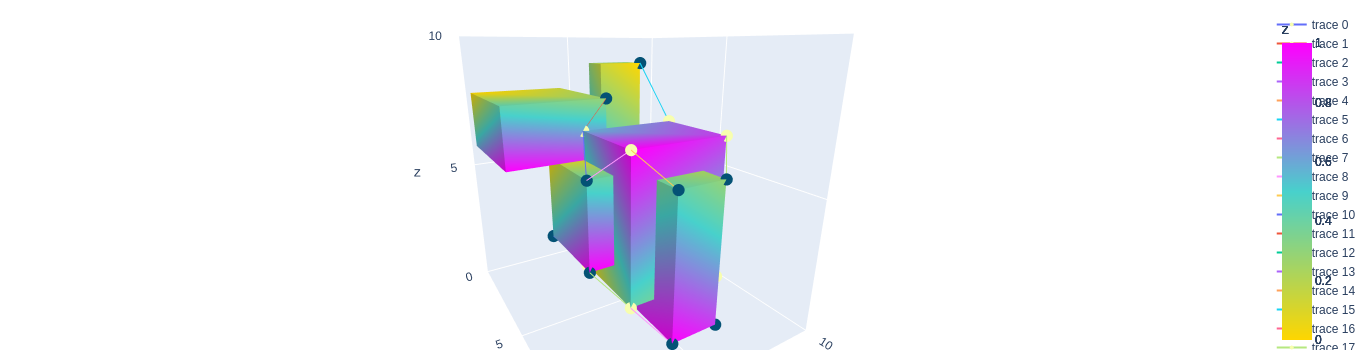

In [147]:
def add_3d_line(fig, coordinates: np.array):
    fig.add_trace(
        go.Scatter3d(
            x=coordinates[0],
            y=coordinates[1],
            z=coordinates[2],
            marker={
                "size": 4,
                "color": [0, 1],
                "colorscale": "Bluyl"
            }
))
                

fig = go.Figure()

for points in transformed_points:
    add_3d_line(fig, points)

add_mesh_3d(fig, np.transpose(tree_alpha.data))


for i in range(0, len(tree_beta.data), 8):
    print(i)
    add_mesh_3d(fig, np.transpose(tree_beta.data[i:i + 8]))

fig.update_layout(
    scene = {
        "xaxis": {
            "nticks": 4, 
            "range": [0,10],
        },
        "yaxis": {
            "nticks": 4, 
            "range": [0, 10],
        },
        "zaxis": {
            "nticks": 4, 
            "range": [0,10],
        },
    },
    width=700,
    margin=dict(r=20, l=10, b=10, t=10))

fig.show()

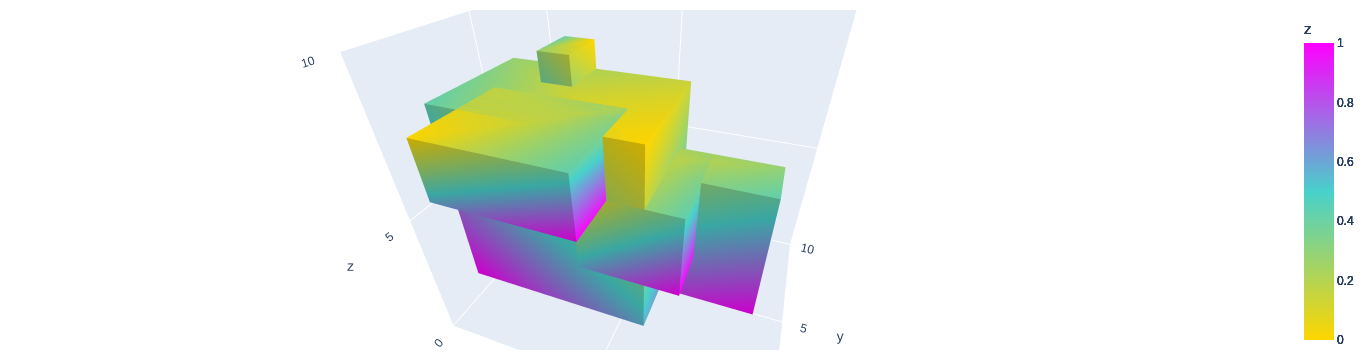

In [149]:


def add_mesh_3d(fig, coordinates: np.array):
    fig.add_trace(
        go.Mesh3d(
            # 8 vertices of a cube
            x=coordinates[0],
            y=coordinates[1],
            z=coordinates[2],
            colorbar_title='z',
            colorscale=[[0, 'gold'],
                        [0.5, 'mediumturquoise'],
                        [1, 'magenta']],
            # Intensity of each vertex, which will be interpolated and color-coded
            intensity = np.linspace(0, 1, 8, endpoint=True),
            # i, j and k give the vertices of triangles
            i = [7, 0, 0, 0, 4, 4, 6, 6, 4, 0, 3, 2],
            j = [3, 4, 1, 2, 5, 6, 5, 2, 0, 1, 6, 3],
            k = [0, 7, 2, 3, 6, 7, 1, 1, 5, 5, 7, 6],
            name='y',
            flatshading=True
        )
    )
    
fig = go.Figure()

for box in list(boxes.values()):
    add_mesh_3d(fig, box)

fig.update_layout(
    scene = {
        "xaxis": {
            "nticks": 4, 
            "range": [0,10],
        },
        "yaxis": {
            "nticks": 4, 
            "range": [0, 10],
        },
        "zaxis": {
            "nticks": 4, 
            "range": [0,10],
        },
    },
    width=700,
    margin=dict(r=20, l=10, b=10, t=10))

fig.show()


In [151]:
# TODO: Explore paritioning and showing points of partition to be considered
box_alpha = boxes["alpha"]
box_alpha

array([[6, 6, 0, 0, 6, 6, 0, 0],
       [2, 7, 7, 2, 2, 7, 7, 2],
       [8, 8, 8, 8, 1, 1, 1, 1]])

In [177]:
import itertools

partition_map = {}
dimensions = ["x", "y", "z"]
range_min = 0
range_max = 10
fidelity = 2

x_vals = list(range(range_min, range_max, fidelity))
all_combo = itertools.product(x_vals, x_vals, x_vals)
for combo in all_combo:
    partition_map["".join([str(i) for i in combo])] = []
    
partition_map

{'000': [],
 '002': [],
 '004': [],
 '006': [],
 '008': [],
 '020': [],
 '022': [],
 '024': [],
 '026': [],
 '028': [],
 '040': [],
 '042': [],
 '044': [],
 '046': [],
 '048': [],
 '060': [],
 '062': [],
 '064': [],
 '066': [],
 '068': [],
 '080': [],
 '082': [],
 '084': [],
 '086': [],
 '088': [],
 '200': [],
 '202': [],
 '204': [],
 '206': [],
 '208': [],
 '220': [],
 '222': [],
 '224': [],
 '226': [],
 '228': [],
 '240': [],
 '242': [],
 '244': [],
 '246': [],
 '248': [],
 '260': [],
 '262': [],
 '264': [],
 '266': [],
 '268': [],
 '280': [],
 '282': [],
 '284': [],
 '286': [],
 '288': [],
 '400': [],
 '402': [],
 '404': [],
 '406': [],
 '408': [],
 '420': [],
 '422': [],
 '424': [],
 '426': [],
 '428': [],
 '440': [],
 '442': [],
 '444': [],
 '446': [],
 '448': [],
 '460': [],
 '462': [],
 '464': [],
 '466': [],
 '468': [],
 '480': [],
 '482': [],
 '484': [],
 '486': [],
 '488': [],
 '600': [],
 '602': [],
 '604': [],
 '606': [],
 '608': [],
 '620': [],
 '622': [],
 '624': [],
 '62

In [168]:
len(partition_map)

125

In [181]:

for point in np.transpose(box_alpha):
    step_values = [i - i % fidelity for i in point]
    print(f"{point} -> {step_values}")
    key = "".join([str(i) for i in step_values])
    
    if "alpha" not in partition_map[key]:
        partition_map[key].append("alpha")

partition_map

[6 2 8] -> [6, 2, 8]
[6 7 8] -> [6, 6, 8]
[0 7 8] -> [0, 6, 8]
[0 2 8] -> [0, 2, 8]
[6 2 1] -> [6, 2, 0]
[6 7 1] -> [6, 6, 0]
[0 7 1] -> [0, 6, 0]
[0 2 1] -> [0, 2, 0]


{'000': [],
 '002': [],
 '004': [],
 '006': [],
 '008': [],
 '020': ['alpha'],
 '022': [],
 '024': [],
 '026': [],
 '028': ['alpha'],
 '040': [],
 '042': [],
 '044': [],
 '046': [],
 '048': [],
 '060': ['alpha'],
 '062': [],
 '064': [],
 '066': [],
 '068': ['alpha'],
 '080': [],
 '082': [],
 '084': [],
 '086': [],
 '088': [],
 '200': [],
 '202': [],
 '204': [],
 '206': [],
 '208': [],
 '220': [],
 '222': [],
 '224': [],
 '226': [],
 '228': [],
 '240': [],
 '242': [],
 '244': [],
 '246': [],
 '248': [],
 '260': [],
 '262': [],
 '264': [],
 '266': [],
 '268': [],
 '280': [],
 '282': [],
 '284': [],
 '286': [],
 '288': [],
 '400': [],
 '402': [],
 '404': [],
 '406': [],
 '408': [],
 '420': [],
 '422': [],
 '424': [],
 '426': [],
 '428': [],
 '440': [],
 '442': [],
 '444': [],
 '446': [],
 '448': [],
 '460': [],
 '462': [],
 '464': [],
 '466': [],
 '468': [],
 '480': [],
 '482': [],
 '484': [],
 '486': [],
 '488': [],
 '600': [],
 '602': [],
 '604': [],
 '606': [],
 '608': [],
 '620': ['al

In [196]:
# TODO: Rasterization method: https://en.wikipedia.org/wiki/Line_drawing_algorithm
from collections import namedtuple

Point = namedtuple("Point", "x y")

point_a = Point(0, 7)
point_b = Point(6, 8)
point_a.x

0

In [249]:
# TODO: This works. Turn it into a function. RASTERISATION -> https://en.wikipedia.org/wiki/Rasterisation
# Bresenham's line algorithm: https://en.wikipedia.org/wiki/Bresenham%27s_line_algorithm

# dx = point_b.x - point_a.x
# dy = point_b.y - point_b.y

# for x in range(point_a.x, point_b.x + 1, 2):
#     y = int(point_a.y + dy * (x - point_a.x) / dx)
#     y = y - y % 2
#     print(x, y)
    
def rasterize(x_1, x_2, y_1, y_2, fidelity):
    def rasterize_low(x_1, x_2, y_1, y_2, fidelity):
        dx = x_2 - x_1
        dy = y_2 - y_1
        yi = fidelity
        if dy < 0:
            yi = -1
            dy = -dy

        D = (2 * dy) - dx
        y = y_1 - y_1 % fidelity

        rasterized_points = []

        for x in range(x_1, x_2 + 1, fidelity):
            rasterized_points.append((x, y))
            if D > 0:
                y = y + yi
                D = D + (2 * (dy - dx))
            else:
                D = D + (2 * dy)

        return rasterized_points
    
    def rasterize_high(x_1, x_2, y_1, y_2, fidelity):
        dx = x_2 - x_1
        dy = y_2 - y_1
        xi = fidelity
        if dx < 0:
            xi = -1
            dx = -dx

        D = (2 * dx) - dy
        x = x_1 - x_1 % fidelity

        rasterized_points = []
        
        for y in range(y_1, y_2 + 1, fidelity):
            rasterized_points.append((x, y))
            if D > 0:
                x = x + xi
                D = D + (2 * (dx - dy))
            else:
                D = D + (2 * dx)

        return rasterized_points
    
    if abs(y_2 - y_1) < abs(x_2 - x_1):
        if x_1 > x_2:
            return rasterize_low(x_2, x_1, y_2, y_1, fidelity)
        else:
            return rasterize_low(x_1, x_2, y_1, y_2, fidelity)
    else:
        if y_1 > y_2:
            return rasterize_high(x_2, x_1, y_2, y_1, fidelity)
        else:
            return rasterize_high(x_1, x_2, y_1, y_2, fidelity)
    
# TODO: How to combine rasterisation from 3d planes?
rasterize(point_a.x, point_b.x, point_a.y, point_b.y, 2)

[(0, 6), (2, 6), (4, 6), (6, 6)]

In [208]:
# Example showing the compilation from rasterisation

x_vals = [0, 1, 2, 3]
y_vals = [3, 4, 5, 6]
z_vals = [4, 5, 6]

# list(itertools.product(x_vals, y_vals, z_vals))

In [209]:
box_alpha

array([[6, 6, 0, 0, 6, 6, 0, 0],
       [2, 7, 7, 2, 2, 7, 7, 2],
       [8, 8, 8, 8, 1, 1, 1, 1]])

In [250]:
# Iterate thru all points and rasterize all lines
for i, x_val in enumerate(box_alpha[0][:-1]):  # x values
    print(f"{x_val}, {box_alpha[1][i]} -> {box_alpha[0][i + 1]}, {box_alpha[1][i + 1]}")
    x_1 = x_val
    x_2 = box_alpha[0][i + 1]
    y_1 = box_alpha[1][i]
    y_2 = box_alpha[1][i + 1]
    print(rasterize(x_1, x_2, y_1, y_2, 2))

6, 2 -> 6, 7
2 7
2
4
6
[(6, 2), (6, 4), (6, 6)]
6, 7 -> 0, 7
[(0, 6), (2, 6), (4, 6), (6, 6)]
0, 7 -> 0, 2
y_2 > y_1
2 7
2
4
6
[(0, 2), (0, 4), (0, 6)]
0, 2 -> 6, 2
[(0, 2), (2, 2), (4, 2), (6, 2)]
6, 2 -> 6, 7
2 7
2
4
6
[(6, 2), (6, 4), (6, 6)]
6, 7 -> 0, 7
[(0, 6), (2, 6), (4, 6), (6, 6)]
0, 7 -> 0, 2
y_2 > y_1
2 7
2
4
6
[(0, 2), (0, 4), (0, 6)]
